In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
data = pd.read_csv('test.csv')

# 提取标签列
labels = data.iloc[:, -1]

# 去除最后一列(label)
data_without_label = data.iloc[:, :-1]

# 设置颜色映射
unique_labels = labels.unique()
num_colors = len(unique_labels)
colors = plt.cm.tab10.colors[:num_colors + 1]

## Visualization

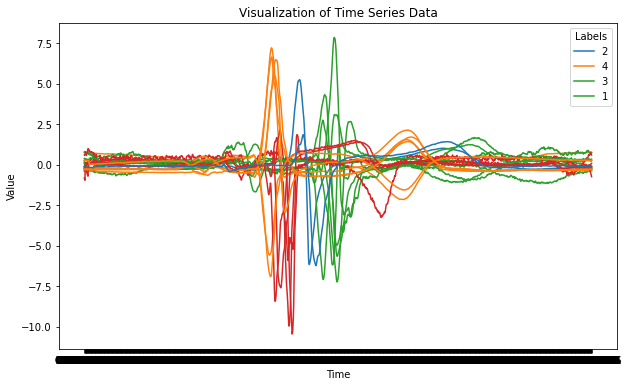

In [15]:
# 可视化
plt.figure(figsize=(10, 6))
for i, (_, row) in enumerate(data_without_label.iterrows()):
    label = labels.iloc[i]
    color_index = list(unique_labels).index(label)
    plt.plot(row, color=colors[color_index])
plt.legend(unique_labels, title='Labels')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Visualization of Time Series Data')
plt.show()

## Reduce dimension

e:\Anaconda_software\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
e:\Anaconda_software\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


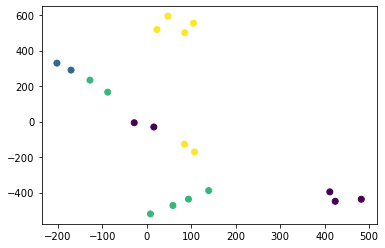

In [16]:
from sklearn.manifold import TSNE
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

tsne = TSNE(perplexity=3, n_components=2)

x = np.array(data_without_label)
y = np.array(labels)
x_tsne = tsne.fit_transform(x)

plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y)
plt.show()

## Clustering

In [17]:
from MyKMeans import *
points = x_tsne
centroids, closestCentroid, points = KMeans(points, k=7, maxIters=20)

[-202.41057  328.96027] [ 47.46263 592.8662 ]
[-202.41057  328.96027] [ 15.68789  -30.549166]
[-202.41057  328.96027] [ 482.4865  -437.10574]
[-202.41057  328.96027] [  58.61595 -472.23538]
[-202.41057  328.96027] [ 22.528217 518.36664 ]
[-202.41057  328.96027] [  84.63232 -127.08774]
[-202.41057  328.96027] [-28.464512  -6.582807]
[ 107.28339 -170.85388] [ 47.46263 592.8662 ]
[ 107.28339 -170.85388] [ 15.68789  -30.549166]
[ 107.28339 -170.85388] [ 482.4865  -437.10574]
[ 107.28339 -170.85388] [  58.61595 -472.23538]
[ 107.28339 -170.85388] [ 22.528217 518.36664 ]
[ 107.28339 -170.85388] [  84.63232 -127.08774]
[ 107.28339 -170.85388] [-28.464512  -6.582807]
[  93.635735 -436.33524 ] [ 47.46263 592.8662 ]
[  93.635735 -436.33524 ] [ 15.68789  -30.549166]
[  93.635735 -436.33524 ] [ 482.4865  -437.10574]
[  93.635735 -436.33524 ] [  58.61595 -472.23538]
[  93.635735 -436.33524 ] [ 22.528217 518.36664 ]
[  93.635735 -436.33524 ] [  84.63232 -127.08774]
[  93.635735 -436.33524 ] [-28.464

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

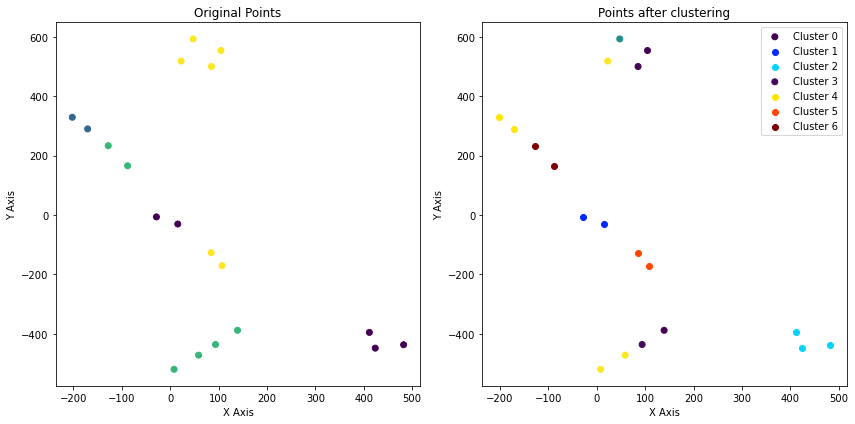

In [18]:
# 创建一个新的matplotlib图形
fig = plt.figure(figsize=(12, 6))

# 第一个子图：可视化原始点
ax1 = fig.add_subplot(121)
ax1.set_title('Original Points')
ax1.scatter(points[:, 0], points[:, 1], c=y, label='Original Points')

# 第二个子图：可视化聚类后的点
ax2 = fig.add_subplot(122)
ax2.set_title('Points after clustering')
unique_clusters, counts_array = np.unique(closestCentroid, return_counts=True)
colors = plt.cm.jet(np.linspace(0, 1, len(unique_clusters)))
for cluster, color in zip(unique_clusters, colors):
    cluster_points = points[closestCentroid == cluster]
    ax2.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, label=f'Cluster {cluster}')

# 添加图例到第二个子图
ax2.legend()

# 设置坐标轴标签
ax1.set_xlabel('X Axis')
ax1.set_ylabel('Y Axis')
ax2.set_xlabel('X Axis')
ax2.set_ylabel('Y Axis')

# 调整子图间距
plt.tight_layout()

# 显示图形
plt.show()


## NMI & ARI

In [19]:
from sklearn.metrics.cluster import normalized_mutual_info_score
labels_true = y
labels_pred = closestCentroid

score = normalized_mutual_info_score(labels_true, labels_pred)
print(score)

0.8196863503552538


In [20]:
from sklearn import metrics
labels_true = y
labels_pred = closestCentroid

score = metrics.adjusted_rand_score(labels_true, labels_pred)
print(score) 

0.5676855895196506
